In [1]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
df = pd.read_csv('movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
#look for missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(col,"-",percent_missing)


name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [4]:
df1 = df.dropna()

In [5]:
#look for missing data
for col in df1.columns:
    percent_missing = np.mean(df1[col].isnull())
    print(col,"-",percent_missing)

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [6]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#change data type of columns
df1['budget'] = df1['budget'].astype('int64')
df1['votes'] = df1['votes'].astype('int64') 
df1['gross'] = df1['gross'].astype('int64') 
df1['runtime'] = df1['runtime'].astype('int64') 

C:\Users\bbiju\AppData\Local\Temp\ipykernel_10340\1291389679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['budget'] = df1['budget'].astype('int64')
C:\Users\bbiju\AppData\Local\Temp\ipykernel_10340\1291389679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['votes'] = df1['votes'].astype('int64')
C:\Users\bbiju\AppData\Local\Temp\ipykernel_10340\1291389679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [8]:
df1.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.      146  
1   58853106   Columbia Pictures      104  
2  538375067           Lucasfilm      124  
3   83453539  Paramount Pictures       88  
4   39846344      Orion Pictures       98

In [9]:
#create correct Year column
#df1["year_correct"]= ((df1['released']).str.split(",", n=1, expand=False))
df1['year_correct'] = df1['released'].str.extract(r'(\d{4})')

C:\Users\bbiju\AppData\Local\Temp\ipykernel_10340\372509471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_correct'] = df1['released'].str.extract(r'(\d{4})')


In [10]:
df1.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime year_correct  
0   46998772        Warner Bros.      146         1980  
1   58853106   Columbia Pictures      104         1980  
2  538375067           Lucasfilm      124         1980  
3   83453539  Paramount Pictures       88         1980  
4   39846344      Orion Pictures       98         1980

In [11]:
df1 = df1.sort_values(by=['gross'],inplace=False,ascending=False)

In [12]:
pd.set_option('display.max_rows',None)

In [13]:
#drop duplicates if needed
#df['company'].drop_duplicates().sort_values(ascending=False)

In [14]:
#budget corellation
#COMPANY WILL HAVE A HIGH CORELATION



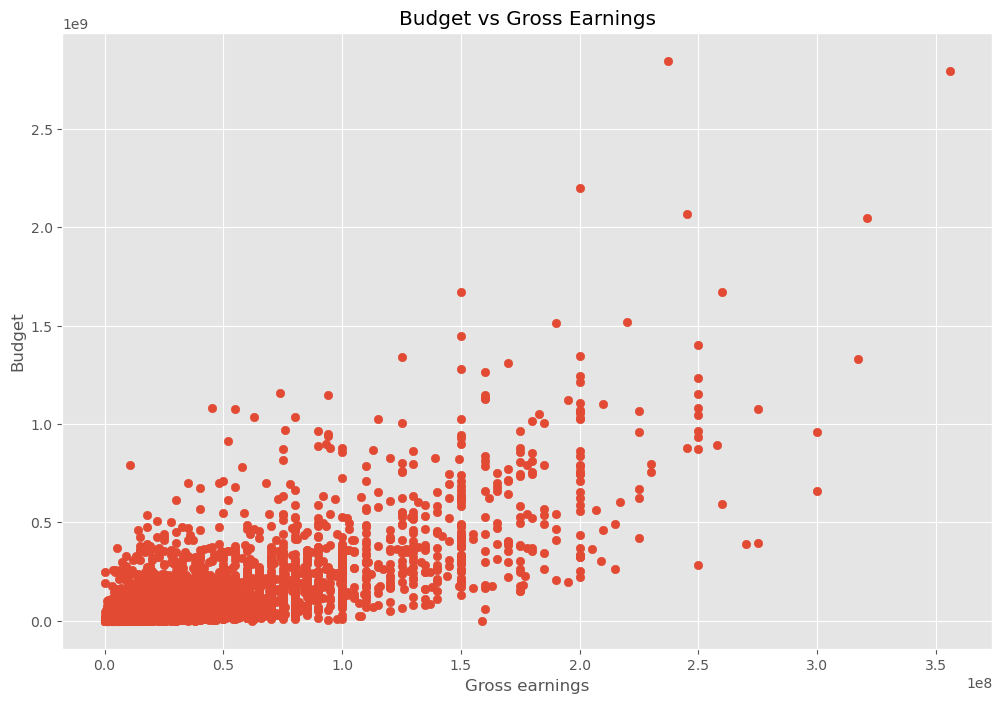

In [15]:
#Scatter plot with budget with gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

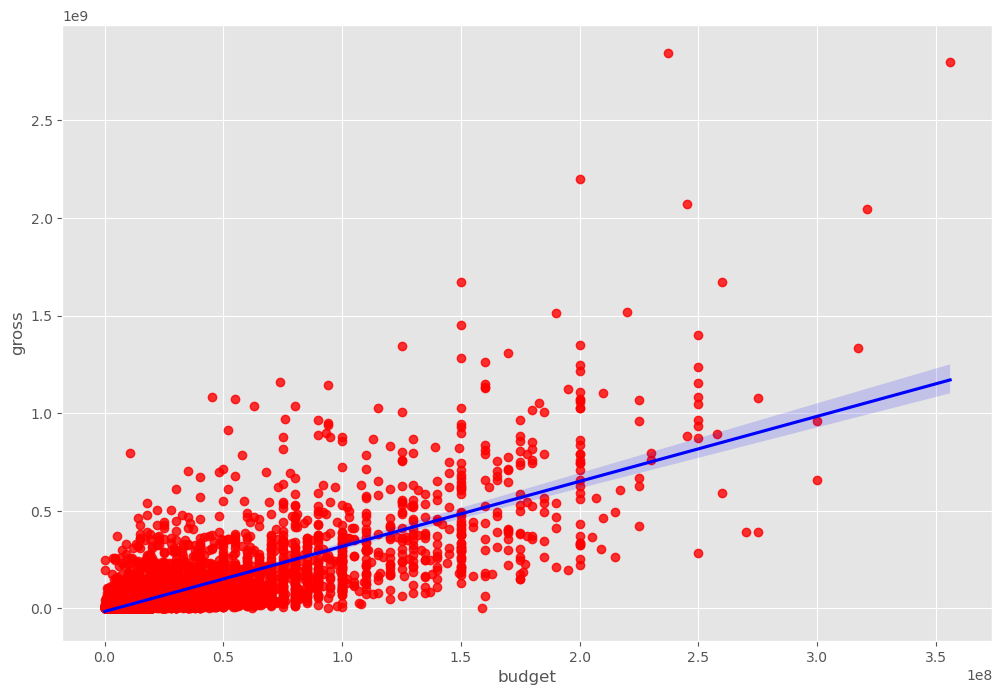

In [16]:
#plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [17]:
#look for Correlation
df1[["score","votes","budget","gross"]].corr(method="pearson") #pearson,kendall,spearman 

score     votes    budget     gross
score   1.000000  0.474256  0.072001  0.222556
votes   0.474256  1.000000  0.439675  0.614751
budget  0.072001  0.439675  1.000000  0.740247
gross   0.222556  0.614751  0.740247  1.000000

In [18]:
#hence we can confirm that there is a high correlation between budget and gross

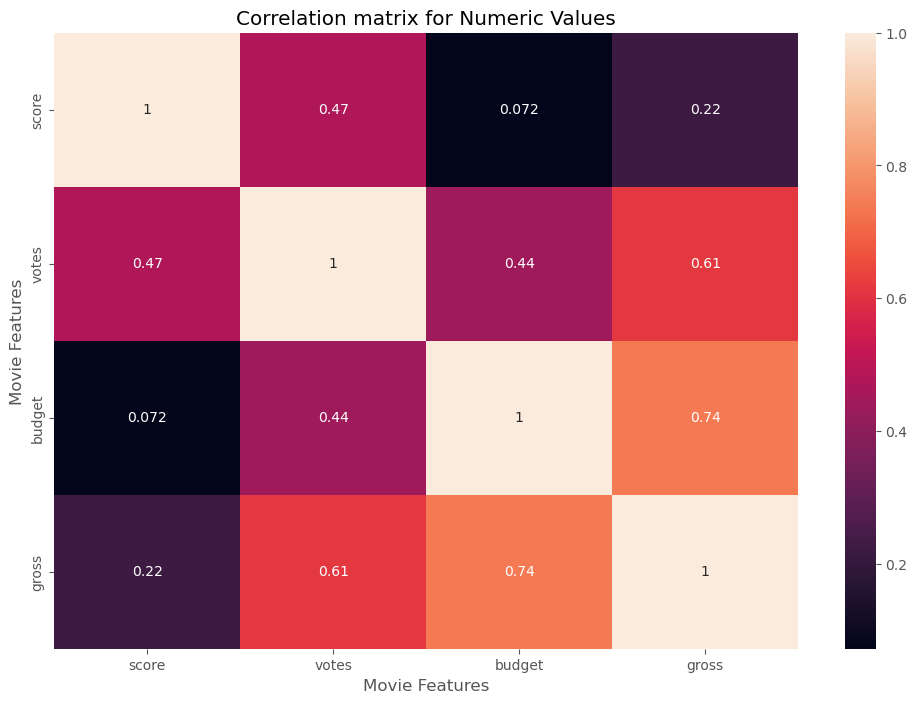

In [19]:
correlation_matrix = df1[["score","votes","budget","gross"]].corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for Numeric Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
df_numerized = df1

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
        

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

In [21]:
df1

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

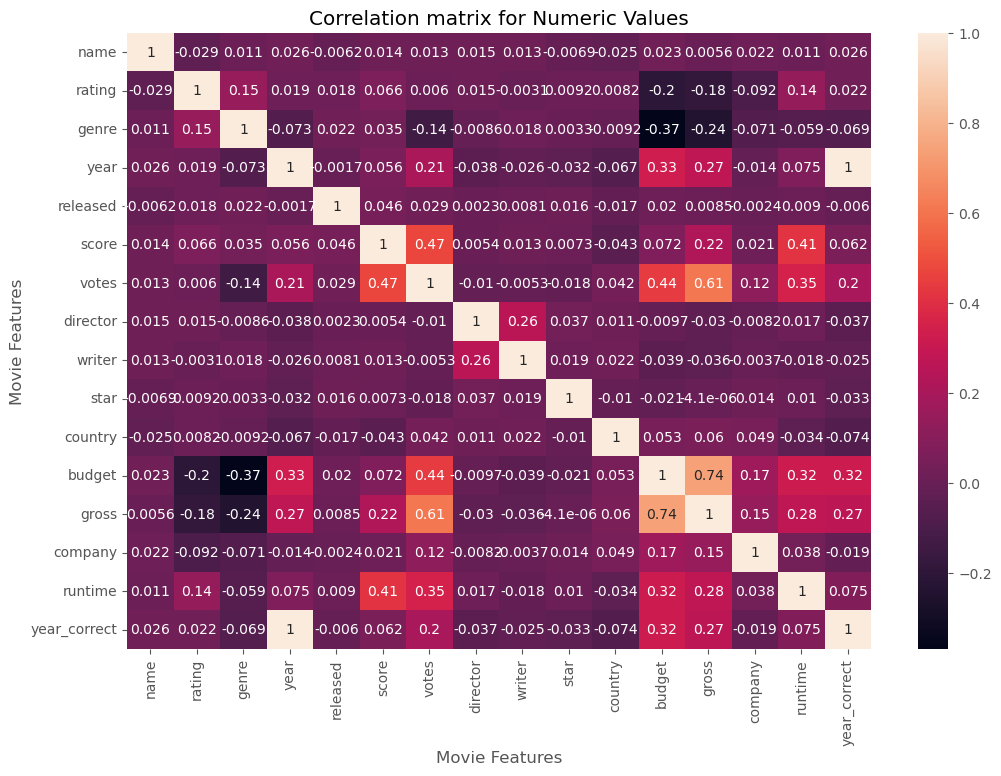

In [22]:
correlation_matrix = df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for Numeric Values')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating       -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre         0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year          0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released     -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score         0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes         0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director      0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer        0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star         -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country      -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget        0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross         0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company       0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime       0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
year_correct  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                 votes  director    writer      star   country    budget  \
name          0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating        0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre        -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year          0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released      0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score         0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes         1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director     -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer       -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star         -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country       0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget        0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross         0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company       0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime       0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
year_correct  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   

                 gross   company   runtime  year_correct  
name          0.005639  0.021697  0.010850      0.025542  
rating       -0.181906 -0.092357  0.140792      0.022021  
genre        -0.244101 -0.071334 -0.059237     -0.069147  
year          0.274321 -0.014333  0.075077      0.998726  
released      0.008501 -0.002407  0.008975     -0.005989  
score         0.222556  0.020656  0.414068      0.061923  
votes         0.614751  0.118470  0.352303      0.203098  
director     -0.029560 -0.008223  0.017433     -0.037371  
writer       -0.035885 -0.003697 -0.017561     -0.025495  
star         -0.000004  0.014082  0.010108     -0.032687  
country       0.060078  0.048569 -0.034477     -0.073569  
budget        0.740247  0.170235  0.318695      0.320312  
gross         1.000000  0.149553  0.275796      0.268721  
company       0.149553  1.000000  0.037585     -0.018806  
runtime       0.275796  0.037585  1.000000      0.075294  
year_correct  0.268721 -0.018806  0.075294      1.000000

In [24]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [25]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs


genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
country       year_correct   -0.073569
year_correct  country        -0.073569
year          genre          -0.073167
genre         year           -0.073167
              company        -0.071334
company       genre          -0.071334
genre         year_correct   -0.069147
year_correct  genre          -0.069147
year          country        -0.066748
country       year           -0.066748
genre         runtime        -0.059237
runtime       genre          -0.059237
score         country        -0.043051
country       score      

In [26]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          year_correct    0.998726
year_correct  year            0.998726
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
#CONCLUSION: 
#         Budget and Votes have the highest correlation to Gross Earnings